In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [ ]:
df_train = pd.read_csv('Train.csv')

#First Exploring data for visualisation and printing

In [ ]:
display(df_train)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Bukenge,Shinyanga,17,3,Kahama,Segese,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
44546,50718,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Ilyamchele Center,Kagera,18,8,Chato,Katende,0,True,GeoData Consultants Ltd,WUA,NaN,True,0,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
44547,67177,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Masango,Ruvuma,10,3,Mbinga,Kigonsera,60,NaN,GeoData Consultants Ltd,VWC,Government,NaN,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44548,2744,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,Pangani,Mng'Ende,Kilimanjaro,3,3,Same,Suji,80,True,GeoData Consultants Ltd,Water authority,Kiumba water supply,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


There are mixed set of data types and also different columns have different scale.

looking at the data types of the features

In [ ]:
print(df_train.dtypes)

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

most of the features are of object data type and some are of float and integer.

now,lets find out which features have least unique values.

In [ ]:
for col in df_train.columns.values:
  list_vals = pd.unique(df_train[col])
  print(col + 'is of type' + str(df_train[col].dtypes)+',has' + str(len(list_vals))+'unique values')
  if len(list_vals)< 10:
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ''
    print('these are:' + list_str[0:len(list_str)-2])  

idis of typeint64,has44550unique values
amount_tshis of typefloat64,has85unique values
date_recordedis of typeobject,has346unique values
funderis of typeobject,has1652unique values
gps_heightis of typeint64,has2396unique values
installeris of typeobject,has1855unique values
longitudeis of typefloat64,has43155unique values
latitudeis of typefloat64,has43155unique values
wpt_nameis of typeobject,has28991unique values
num_privateis of typeint64,has59unique values
basinis of typeobject,has9unique values
these are:PanganiLake NyasaRufijiLake TanganyikaLake VictoriaWami / RuvuInternalRuvuma / Southern CoastLake Ruk
subvillageis of typeobject,has16618unique values
regionis of typeobject,has21unique values
region_codeis of typeint64,has27unique values
district_codeis of typeint64,has20unique values
lgais of typeobject,has125unique values
wardis of typeobject,has2080unique values
populationis of typeint64,has956unique values
public_meetingis of typeobject,has3unique values
these are:TrueFalsen


In [ ]:
for col in df_train.columns.values: # for each column
  unique_entries = pd.unique(df_train[col]) # unique elements in a column
  print(f"The column '{col}'  has {len(unique_entries)} unique entries, and {df_train[col].isnull().sum()} NaN values")

The column 'id'  has 44550 unique entries, and 0 NaN values
The column 'amount_tsh'  has 85 unique entries, and 0 NaN values
The column 'date_recorded'  has 346 unique entries, and 0 NaN values
The column 'funder'  has 1652 unique entries, and 2793 NaN values
The column 'gps_height'  has 2396 unique entries, and 0 NaN values
The column 'installer'  has 1855 unique entries, and 2807 NaN values
The column 'longitude'  has 43155 unique entries, and 0 NaN values
The column 'latitude'  has 43155 unique entries, and 0 NaN values
The column 'wpt_name'  has 28991 unique entries, and 0 NaN values
The column 'num_private'  has 59 unique entries, and 0 NaN values
The column 'basin'  has 9 unique entries, and 0 NaN values
The column 'subvillage'  has 16618 unique entries, and 287 NaN values
The column 'region'  has 21 unique entries, and 0 NaN values
The column 'region_code'  has 27 unique entries, and 0 NaN values
The column 'district_code'  has 20 unique entries, and 0 NaN values
The column 'lga

We should drop the features of similar type and the feature which will have no effect (eg. recorded_by has only one unique value so this column is not helpful at all) also among quality and quality group we can only keep one same goes for quantity and quantity group because the extra column will not give any extra knowledge to the model.all have unique id so it can also be dropped

In [ ]:
df_train = df_train.drop(['id','source','wpt_name', 'num_private', 'region','quantity','quality_group','lga','ward','management','recorded_by', 'payment', 
           'extraction_type_group','extraction_type_class'],axis=1)

Now the label column is the status_group column as that is what we have to predict.

In [ ]:
train_label = df_train['status_group']

In [ ]:
train_label.value_counts()

functional                 24194
non functional             17118
functional needs repair     3238
Name: status_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


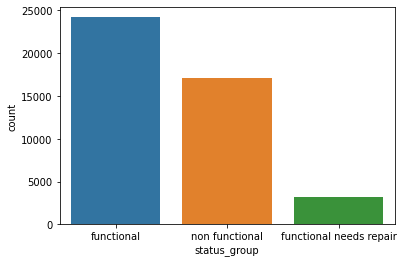

In [ ]:
sns.countplot(train_label)

In [ ]:
train_label.value_counts()/len(train_label)

functional                 0.543075
non functional             0.384242
functional needs repair    0.072682
Name: status_group, dtype: float64

#Hypothesis

**We can see from above that the % of functional, non functional and functional needs repair is 54%, 38% and 7.2% respectively. And this should be our hypothesis that when we finally predict on testing data we get these kind of percentages.**

mapping each label to a number so that calculations will be easy. and also we will be needing it to plot the pivot table as there are lot object type datas. 

In [ ]:
status_vals = {'functional':2, 'functional needs repair':1, 'non functional':0}
df_train['status_values']  = df_train.status_group.replace(status_vals)

In [ ]:
df_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,district_code,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_values
0,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Pangani,Mafurini,3,5,90,True,Water Board,Machame water supply,True,2008,gravity,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional,2
1,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,Lake Nyasa,Ituni,11,5,70,False,Private operator,Mgowel,False,1984,gravity,commercial,never pay,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional,2
2,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Pangani,Melebuki,2,2,150,True,VWC,Saitero olosaita pipe line,True,2002,gravity,user-group,never pay,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,non functional,0
3,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Rufiji,Darajani,12,2,0,True,VWC,NaN,True,0,gravity,user-group,annually,soft,insufficient,river/lake,surface,communal standpipe,communal standpipe,functional,2
4,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Pangani,Mwira A,3,2,34,True,VWC,Churu water supply,False,2007,gravity,user-group,monthly,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,functional,2


Now we will start treating the training data by columns starting from funder column

We will keep the top 10 values based on frequency and will assign the rest to 11th synthetic value. same we will do for all the columns with high variety.

In [ ]:
 def funder_cl(row):  
    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    elif row['funder']=='Kkkt':
        return 'Kkkt'
    elif row['funder']=='World Vision':
        return 'World Vision'
    elif row['funder']=='Unicef':
        return 'Unicef'
    elif row['funder']=='Tasaf':
        return 'Tasaf'
    elif row['funder']=='District Council':
        return 'District Council'
    else:
        return 'other'
    
df_train['funder'] = df_train.apply(lambda row: funder_cl(row), axis=1)

In [ ]:
pivot_table = pd.pivot_table(df_train,index=['funder', 'status_group'],
                           values='status_values', aggfunc='count')
pivot_table
pivot_df= df_train[['funder','status_group','status_values']]
pivot_table = pivot_df.pivot_table(index='funder',
                           columns='status_group', aggfunc='count')
pivot_table

status_values                                       
status_group        functional functional needs repair non functional
funder                                                               
District Council           294                      35            326
Kkkt                       529                      55            380
Tasaf                      365                      53            247
Unicef                     467                      71            270
World Vision               545                      99            280
danida                    1282                     119            961
gov                       2781                     519           3480
hesawa                     692                     180            767
other                    16231                    1954           9574
rwssp                      609                      80            343
world_bank                 399                      73            490

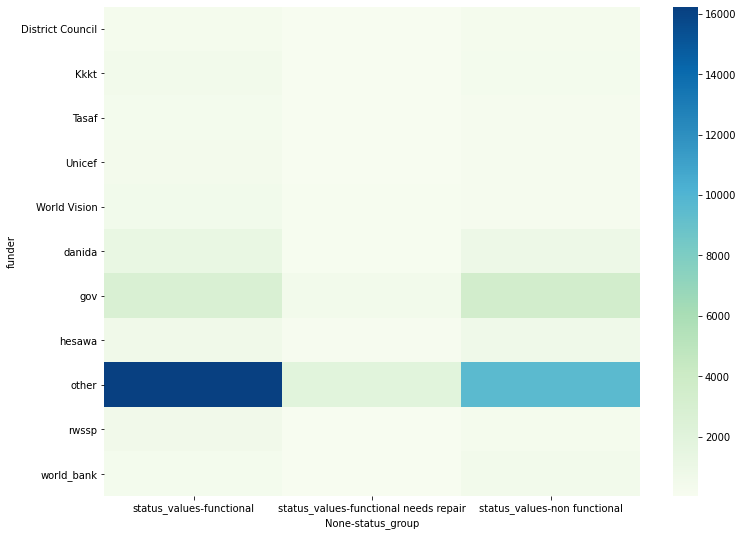

In [ ]:
a4_dims = (12, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(pivot_table, cmap = 'GnBu')

In [ ]:
df_train.installer.value_counts().head(10)

DWE                   13005
Government             1365
RWE                     876
Commu                   806
DANIDA                  788
KKKT                    681
Hesawa                  622
0                       572
TCRS                    537
Central government      504
Name: installer, dtype: int64

In [ ]:
def installer_cl(row):
    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'gov'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'
    elif row['installer']=='KKKT':
        return 'kkkt'
    elif row['installer']=='Hesawa':
        return 'hesawa'
    elif row['installer']=='TCRS':
        return 'tcrs'
    elif row['installer']=='Central government':
        return 'Central government'
    else:
        return 'other'  
df_train['installer'] = df_train.apply(lambda row: installer_cl(row), axis=1)

In [ ]:
pivot_df= df_train[['installer','status_group','status_values']]
pivot_table = pivot_df.pivot_table(index='installer',
                           columns='status_group', aggfunc='count')
pivot_table

status_values                                       
status_group          functional functional needs repair non functional
installer                                                              
Central government           120                       4            380
commu                        546                      27            233
danida                       404                      64            320
dwe                         7049                    1199           4757
gov                          413                     195            757
hesawa                       348                      14            260
kkkt                         311                      51            319
other                      14552                    1551           9263
rwe                          229                      99            548
tcrs                         222                      34            281

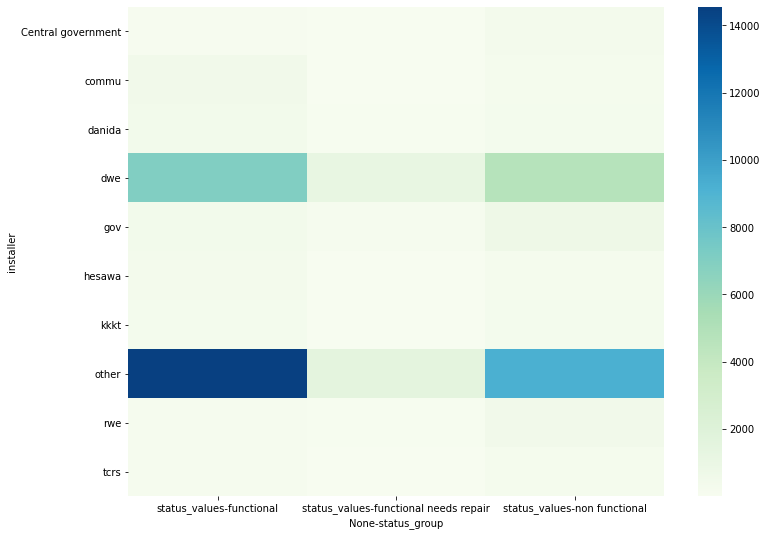

In [ ]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(pivot_table, cmap='GnBu')

In [ ]:
df_train.subvillage.value_counts().head(10)

Madukani    403
Majengo     391
Shuleni     380
Kati        274
Mtakuja     187
Sokoni      171
M           139
Muungano    120
Mbuyuni     119
Mlimani     115
Name: subvillage, dtype: int64

there are very less values present we will fill the remaining as other.

In [ ]:
df_train.subvillage = df_train.subvillage.fillna('other')

In [ ]:
df_train.public_meeting.value_counts()

True     38212
False     3847
Name: public_meeting, dtype: int64

as there are only two values we will fill the missing one as unknown

In [ ]:
df_train.public_meeting = df_train.public_meeting.fillna('Unknown')

In [ ]:
df_train.scheme_management.value_counts()

VWC                 27651
WUG                  3906
Water authority      2361
WUA                  2166
Water Board          2078
Parastatal           1272
Private operator      792
Company               790
Other                 575
SWC                    69
Trust                  57
None                    1
Name: scheme_management, dtype: int64

In [ ]:
 def scheme_cl(row):
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    elif row['scheme_management']=='Parastatal':
        return 'Parastatal'
    elif row['scheme_management']=='Private operator':
        return 'pri_optr'
    elif row['scheme_management']=='SWC':
        return 'swc'
    elif row['scheme_management']=='Company':
        return 'company'
    elif row['scheme_management']=='Trust':
        return 'trust'
    else:
        return 'other'
df_train['scheme_management'] = df_train.apply(lambda row: scheme_cl(row), axis=1)

In [ ]:
pivot_df= df_train[['scheme_management','status_group','status_values']]
pivot_table = pivot_df.pivot_table(index='scheme_management',
                           columns='status_group', aggfunc='count')
pivot_table

status_values                                       
status_group         functional functional needs repair non functional
scheme_management                                                     
Parastatal                  735                     151            386
company                     401                      27            362
other                      1730                     177           1501
pri_optr                    542                      16            234
swc                          12                       1             56
trust                        35                       5             17
vwc                       14242                    1777          11632
wtr_auth                   1208                     325            828
wtr_brd                    1555                      75            448
wua                        1494                     183            489
wug                        2240                     501           1165

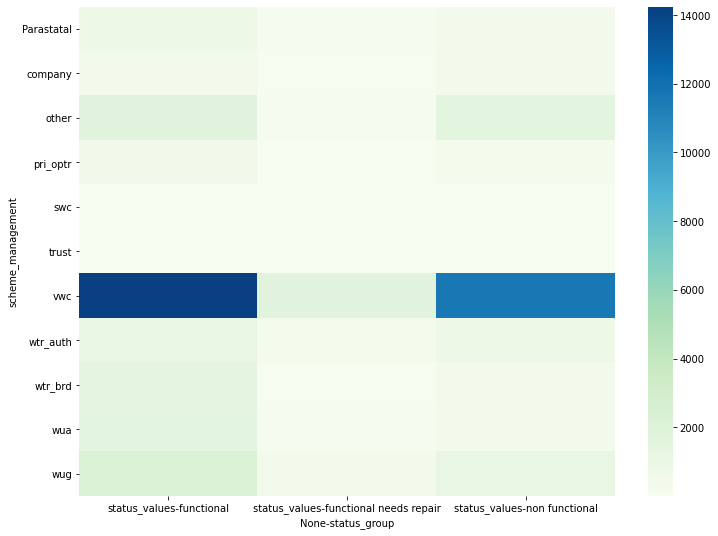

In [ ]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(pivot_table, cmap='GnBu')

In [ ]:
df_train.scheme_name.value_counts().head(10)

K                              528
None                           494
Borehole                       402
M                              310
Chalinze wate                  300
DANIDA                         273
Government                     238
Ngana water supplied scheme    221
wanging'ombe water supply s    186
wanging'ombe supply scheme     182
Name: scheme_name, dtype: int64

here also very less values are present we will fill the missing ones as other.

In [ ]:
df_train.scheme_name = df_train.scheme_name.fillna('other')

In [ ]:
 # changing the construction year to numeric value
df_train.construction_year = pd.to_numeric(df_train.construction_year)

Lets convert the construction year ctegorically to 60s, 70s,80s etc.

In [ ]:
def construction_cl(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
df_train['construction_year'] = df_train.apply(lambda row: construction_cl(row), axis=1)

In [ ]:
pivot_df= df_train[['construction_year','status_group','status_values']]
pivot_table = pivot_df.pivot_table(index='construction_year',
                           columns='status_group', aggfunc='count')
pivot_table

status_values                                       
status_group         functional functional needs repair non functional
construction_year                                                     
00s                        7514                     744           3282
10s                        2836                     164            860
60s                         115                      35            253
70s                        1053                     241           1974
80s                        1704                     304           2175
90s                        3057                     377           2221
unknown                    7915                    1373           6353

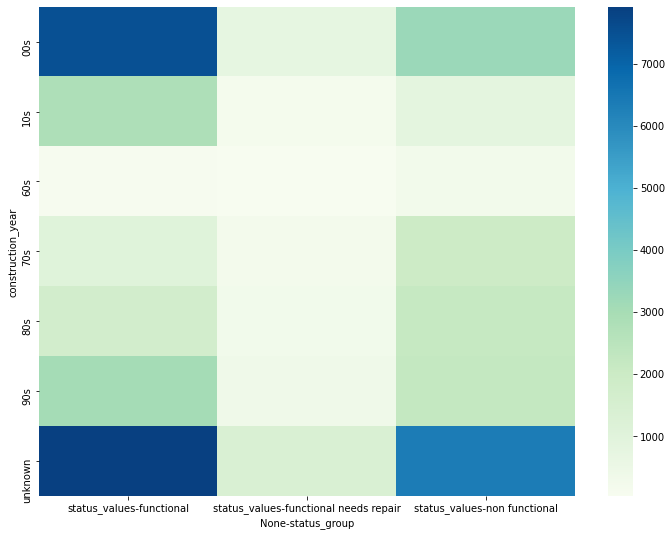

In [ ]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(pivot_table, cmap='GnBu')

as dates are given we will convert into days since recorded by subtracting al the dates from the most recent one.

In [ ]:
 ## Converting the Month column into date time object.
df_train['month']=pd.to_datetime(df_train.date_recorded).dt.month

In [ ]:
df_train.date_recorded = pd.to_datetime(df_train.date_recorded)
df_train.date_recorded.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                   44550
unique                    346
top       2011-03-15 00:00:00
freq                      423
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [ ]:
df_train.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(df_train.date_recorded)
df_train.columns = ['days_since_recorded' if x=='date_recorded' else x for x in df_train.columns]
df_train.days_since_recorded = df_train.days_since_recorded.astype('timedelta64[D]').astype(int)
df_train.days_since_recorded.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


count    44550.000000
mean       615.289809
std        333.898570
min          0.000000
25%        297.000000
50%        420.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [ ]:
## basin
df_train.basin.value_counts()

Lake Victoria              7623
Pangani                    6703
Rufiji                     6045
Internal                   5855
Lake Tanganyika            4775
Wami / Ruvu                4430
Lake Nyasa                 3902
Ruvuma / Southern Coast    3381
Lake Rukwa                 1836
Name: basin, dtype: int64

In [ ]:
pivot_df= df_train[['basin','status_group','status_values']]
pivot_table = pivot_df.pivot_table(index='basin',
                           columns='status_group', aggfunc='count')
pivot_table

status_values                                       
status_group               functional functional needs repair non functional
basin                                                                       
Internal                         3379                     420           2056
Lake Nyasa                       2525                     195           1182
Lake Rukwa                        748                     203            885
Lake Tanganyika                  2318                     545           1912
Lake Victoria                    3793                     741           3089
Pangani                          4021                     352           2330
Rufiji                           3836                     338           1871
Ruvuma / Southern Coast          1268                     237           1876
Wami / Ruvu                      2306                     207           1917

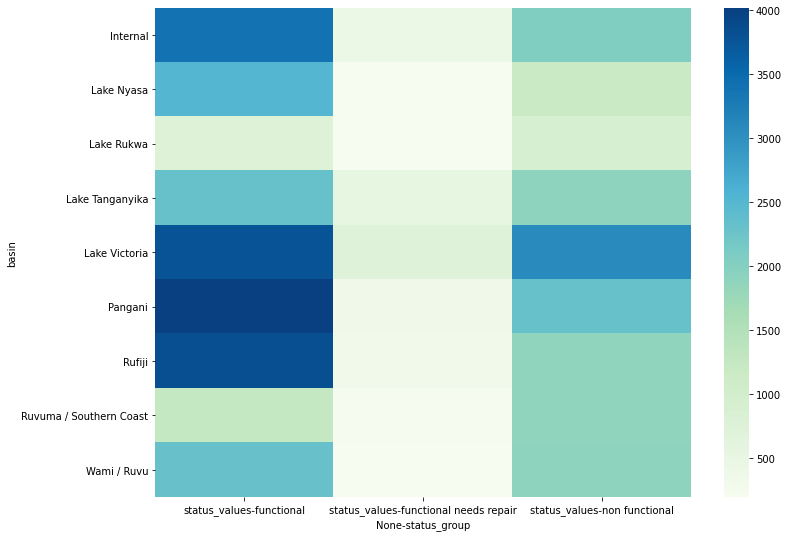

In [ ]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(pivot_table, cmap='GnBu')

In [ ]:
df_train.extraction_type.value_counts()

gravity                      20127
nira/tanira                   6130
other                         4768
submersible                   3560
swn 80                        2771
mono                          2164
india mark ii                 1768
afridev                       1339
ksb                           1043
other - rope pump              335
other - swn 81                 177
windmill                        89
india mark iii                  77
cemo                            70
other - play pump               65
walimi                          39
climax                          26
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [ ]:
def extraction_cl(row):
    if row['extraction_type']=='gravity':
        return 'gravity'
    elif row['extraction_type']=='nira/tanira':
        return 'nira'
    elif row['extraction_type']=='submersible':
        return 'submersible'
    elif row['extraction_type']=='swn 80':
        return 'swn'
    elif row['extraction_type']=='mono':
        return 'mono'
    elif row['extraction_type']=='india mark ii':
        return 'indiamark2'
    elif row['extraction_type']=='afridev':
        return 'afridev'
    elif row['extraction_type']=='ksb':
        return 'ksb'
    elif row['extraction_type']=='windmill':
        return 'windmill'
    elif row['extraction_type']=='india mark iii':
        return 'indiamark3'
    else:
        return 'other'
df_train['extraction_type'] = df_train.apply(lambda row: extraction_cl(row), axis=1)

In [ ]:
pivot_df= df_train[['extraction_type','status_group','status_values']]
pivot_table = pivot_df.pivot_table(index='extraction_type',
                           columns='status_group', aggfunc='count')
pivot_table

status_values                                       
status_group       functional functional needs repair non functional
extraction_type                                                     
afridev                   924                      28            387
gravity                 12046                    2042           6039
indiamark2               1061                      56            651
indiamark3                 34                       1             42
ksb                       509                      22            512
mono                      818                     103           1243
nira                     4075                     488           1567
other                    1153                     181           4148
submersible              1964                     160           1436
swn                      1573                     152           1046
windmill                   37                       5             47

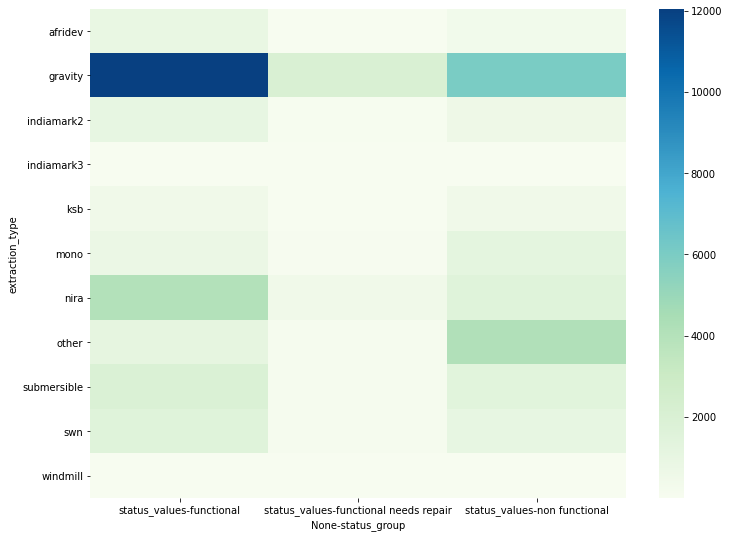

In [ ]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(pivot_table, cmap='GnBu')

In [ ]:
df_train.management_group.value_counts()

user-group    39373
commercial     2736
parastatal     1347
other           692
unknown         402
Name: management_group, dtype: int64

In [ ]:
# almost all are managed by user-group we can drop it
df_train = df_train.drop(['management_group'], axis=1)

In [ ]:
df_train.water_quality.value_counts()

soft                  38093
salty                  3668
unknown                1397
milky                   606
coloured                364
salty abandoned         264
fluoride                147
fluoride abandoned       11
Name: water_quality, dtype: int64

In [ ]:
df_train.quantity_group.value_counts()

enough          24821
insufficient    11367
dry              4725
seasonal         3049
unknown           588
Name: quantity_group, dtype: int64

 We can drop the location data 

In [ ]:
df_train= df_train.drop(['longitude', 'latitude', 'region_code', 'district_code'], axis=1)

In [ ]:
## Dropping the status_values, operation_time, month which are added for the caluculations.
df_train= df_train.drop(['status_values','month'], axis=1)

In [ ]:
df_train.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,subvillage,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7.0,258,other,1203,other,Pangani,Mafurini,90,True,wtr_brd,Machame water supply,True,00s,gravity,per bucket,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,1016,other,1409,other,Lake Nyasa,Ituni,70,False,pri_optr,Mgowel,False,80s,gravity,never pay,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
2,0.0,333,gov,1572,dwe,Pangani,Melebuki,150,True,vwc,Saitero olosaita pipe line,True,00s,gravity,never pay,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,non functional
3,0.0,975,District Council,0,other,Rufiji,Darajani,0,True,vwc,other,True,unknown,gravity,annually,soft,insufficient,river/lake,surface,communal standpipe,communal standpipe,functional
4,300.0,270,District Council,1283,other,Pangani,Mwira A,34,True,vwc,Churu water supply,False,00s,gravity,monthly,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,functional


In [ ]:
train  = df_train


In [ ]:
train = train.drop('status_group', axis=1)

In [ ]:
def transform_feature(df, column_name):
    unique_values = set(df[column_name].tolist())
    transformer_dict = {}
    for index, value in enumerate(unique_values):
        transformer_dict[value] = index
    df[column_name] = df[column_name].apply(lambda y: transformer_dict[y])
    return df

In [ ]:
integer_columns = ['days_since_recorded', 'population','gps_height'] 
columns_to_transform = [col for col in train.columns if col not in integer_columns]
for column in columns_to_transform: 
    train = transform_feature(train, column)
    

In [ ]:
## Converting the Training dataframe into a matrix and predictor as y 
X = train.to_numpy()
y = df_train["status_group"].tolist()

#spliting the train data so that we can train our model and do the hyperparameter tuning.

To decide whichframe work to use :- https://stackoverflow.com/questions/2595176/which-machine-learning-classifier-to-choose-in-general

https://nlp.stanford.edu/IR-book/html/htmledition/choosing-what-kind-of-classifier-to-use-1.html

In [ ]:
import sklearn.model_selection 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state = 40)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
scoring = 'f1_weighted'  # as the target variable  is multi_class
hyperparameters={'max_depth':[2,5,10,20],"n_estimators":[10,30,1000]}
clf = GridSearchCV(rfc , param_grid= hyperparameters , scoring = scoring )
clf.fit(np.array(X_train) ,np.squeeze(y_train))
print("BEST PARAMETER:")
print(clf.best_params_)
print("best scoring" + scoring + str(clf.best_score_))
print("test classification report")
y_true , y_pred =np.squeeze(y_test) ,clf.predict(np.array(X_test))
print(classification_report(y_true , y_pred))

BEST PARAMETER:
{'max_depth': 20, 'n_estimators': 1000}
best scoringf1_weighted0.7817538808135875
test classification report
                         precision    recall  f1-score   support

             functional       0.78      0.91      0.84      7234
functional needs repair       0.59      0.22      0.32       998
         non functional       0.85      0.74      0.79      5133

               accuracy                           0.80     13365
              macro avg       0.74      0.62      0.65     13365
           weighted avg       0.79      0.80      0.78     13365



In [ ]:
import sklearn.ensemble

**Feature importance**

In [ ]:
 rfc.fit(X_train, y_train)
 print(rfc.feature_importances_)

[0.03540291 0.10923388 0.03077505 0.09322901 0.02382751 0.0323353
 0.12734924 0.06037196 0.01314498 0.02745541 0.0475476  0.0159288
 0.03643745 0.04964747 0.0306736  0.02016718 0.13378011 0.02464671
 0.0080112  0.04751217 0.03252243]


Text(0, 0.5, 'Importance')

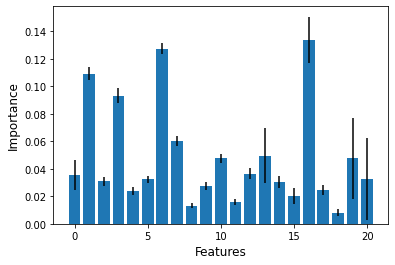

In [ ]:
importance = rfc.feature_importances_
importance = pd.DataFrame(importance, index=train.columns, 
                          columns=["Importance"])
 
importance["Std"] = np.std([tree.feature_importances_ 
                            for tree in rfc.estimators_], axis=0)
 
x = range(importance.shape[0])
y = importance.iloc[:, 0]
yerr = importance.iloc[:, 1]
lables = list(train.columns.values)
 
 
 
ax = plt.bar(x, y, yerr=yerr ,align="center")
plt.xlabel('Features', fontsize = 12)
plt.ylabel('Importance', fontsize = 12)

In [ ]:
from sklearn.metrics import classification_report
predicted = rfc.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

                         precision    recall  f1-score   support

             functional       0.79      0.87      0.83      7234
functional needs repair       0.52      0.29      0.37       998
         non functional       0.82      0.77      0.79      5133

               accuracy                           0.79     13365
              macro avg       0.71      0.64      0.67     13365
           weighted avg       0.78      0.79      0.78     13365



#XGB classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
n_estimators = [50,100,1000] #no. of trees
gamma = [0.1,0.2]
max_depth = [2,5]
parameter_grid = {'n_estimators':n_estimators,'max_depth':max_depth , 'gamma':gamma}
print(parameter_grid.keys())

dict_keys(['n_estimators', 'max_depth', 'gamma'])


In [ ]:
xgb_grid = GridSearchCV(estimator=xgb,param_grid=parameter_grid,cv=3,n_jobs = 5)
xgb_grid.fit(np.array(X_train),np.squeeze(y_train))

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'gamma': [0.1, 0.2], 'max_depth': [2, 5],
                         'n_estimators': [50, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, retu

In [ ]:
print('best score for training data'+':' + str(xgb_grid.best_score_))
print('The classification report')

y_true,y_pred = np.squeeze(y_test),xgb_grid.predict(np.array(X_test))
print(classification_report(y_true,y_pred))

best score for training data:0.7828443161776496
The classification report
                         precision    recall  f1-score   support

             functional       0.78      0.89      0.83      7234
functional needs repair       0.56      0.24      0.34       998
         non functional       0.83      0.75      0.79      5133

               accuracy                           0.79     13365
              macro avg       0.72      0.63      0.65     13365
           weighted avg       0.78      0.79      0.78     13365



**Feature importance**

In [ ]:
xgb.fit(X_train, y_train)
print(xgb.feature_importances_)

[0.08905645 0.01845343 0.04385292 0.02057492 0.02595443 0.01825666
 0.00406941 0.01752253 0.02491613 0.02505153 0.00942924 0.00830889
 0.0508205  0.07652488 0.02312835 0.03614496 0.2684943  0.02484141
 0.04309228 0.16038021 0.01112651]


#Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [ ]:
criterion = ['gini','entropy']
max_depth = [2,5,10]
parameter_grid = {'criterion':criterion,'max_depth':max_depth}


In [ ]:
#grid search for best parameter
DTC_grid = GridSearchCV(estimator= DTC,param_grid=parameter_grid,cv=3,n_jobs=4)
DTC_grid.fit(np.array(X_train),np.squeeze(y_train))

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [ ]:
print('Best parameters :')
print(DTC_grid.best_params_)

print('best score for training data'+':' + str(DTC_grid.best_score_))
print('The classification report')

y_true,y_pred = np.squeeze(y_test),DTC_grid.predict(np.array(X_test))
print(classification_report(y_true,y_pred))

Best parameters :
{'criterion': 'gini', 'max_depth': 10}
best score for training data:0.737694404361071
The classification report
                         precision    recall  f1-score   support

             functional       0.72      0.92      0.80      7234
functional needs repair       0.55      0.12      0.19       998
         non functional       0.83      0.63      0.71      5133

               accuracy                           0.75     13365
              macro avg       0.70      0.55      0.57     13365
           weighted avg       0.75      0.75      0.72     13365



**Feature importance**

In [ ]:
DTC.fit(X_train, y_train)
print(DTC.feature_importances_)

[0.02768169 0.10786415 0.0270188  0.10888892 0.02196284 0.02725385
 0.1390287  0.0593416  0.01180003 0.0223303  0.0469822  0.0145352
 0.03376201 0.0348506  0.02483144 0.01396683 0.15697419 0.02168666
 0.00506652 0.01729159 0.07688188]


#Touching the test data first time here and we will be using random forest classifier to predict our test labels as that gave us the maximum accuracy.

We will be using the test data at the very end but we need perform the same operations on the test data also same as train data to correctly implement our model

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test = df_test.drop(['longitude', 'latitude', 'region_code', 'district_code',
                  'num_private', 'id', 'payment', 'management_group', 'management', 
                  'extraction_type_class', 'extraction_type_group', 'recorded_by','region', 'lga',
                  'ward', 'wpt_name', 'quantity',
                 'quality_group', 'source'], axis=1)

In [ ]:
#cleaning the columns as the training data set
df_test.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(df_test.date_recorded)
df_test.columns = ['days_since_recorded' if x=='date_recorded' else x for x in df_test.columns]
df_test.days_since_recorded = df_test.days_since_recorded.astype('timedelta64[D]').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
df_test.permit = df_test.permit.fillna('Unknown')
df_test.public_meeting = df_test.public_meeting.fillna('Unknown')

In [ ]:
df_test['scheme_management'] = df_test.apply(lambda row: scheme_cl(row), axis=1)
df_test['construction_year'] = df_test.apply(lambda row: construction_cl(row), axis=1)
df_test['installer'] = df_test.apply(lambda row: installer_cl(row), axis=1)
df_test['funder'] = df_test.apply(lambda row: funder_cl(row), axis=1)
df_test['extraction_type'] = df_test.apply(lambda row: extraction_cl(row), axis=1)

In [ ]:
df_test.head()

,Unnamed: 0,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,subvillage,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,0.0,1012,other,1676,other,Rufiji,Mahanzi,769,True,vwc,Wasa,True,00s,gravity,never pay,soft,dry,spring,groundwater,communal standpipe,communal standpipe
1,1,0.0,961,other,0,dwe,Wami / Ruvu,Uzunguni,0,True,vwc,Soya,False,unknown,mono,never pay,soft,enough,borehole,groundwater,communal standpipe,communal standpipe
2,2,0.0,982,other,0,other,Rufiji,Uganda,0,True,vwc,NaN,True,unknown,nira,never pay,soft,enough,shallow well,groundwater,hand pump,hand pump
3,3,0.0,873,other,0,other,Lake Victoria,Nyamilanda A,0,True,vwc,NaN,True,unknown,other,never pay,soft,enough,shallow well,groundwater,hand pump,hand pump
4,4,0.0,856,World Vision,0,other,Lake Victoria,Ibosa,0,True,vwc,NaN,True,unknown,gravity,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
test = df_test

In [ ]:
integer_columns = ['days_since_recorded', 'population','gps_height'] 
columns_to_transform = [col for col in train.columns if col not in integer_columns]
for column in columns_to_transform: 
  test = transform_feature(test, column)

In [ ]:
test = test.drop('Unnamed: 0', axis=1)

In [ ]:
X_new = test.to_numpy()
y_new = rfc.predict(X_new)#using rfc to predict

#predicted labels

In [ ]:
y_new

array(['non functional', 'non functional', 'functional', ...,
       'non functional', 'functional', 'functional'], dtype='<U23')

In [ ]:
y_new1 = pd.DataFrame(y_new)
y_new1.value_counts()/len(y_new1)

functional                 0.630707
non functional             0.341010
functional needs repair    0.028283
dtype: float64

The predicted values are in range of 10% of our hypothesis. 

Uploading the final label value.

In [ ]:
y_new1.to_csv('Final_label.csv')

REFERENCES


1.https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/


2.https://machinelearningmastery.com/framework-for-data-preparation-for-machine-learning/

3.https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/

4.https://youtu.be/Ato-hcv0NK0 (ml for smart monkeys)